<h1 style="color:navy">Airbnb Exploratory Data Analysis</h1>

I would like to explore the property sizes and types available on Airbnb within New York City. I will be using bedroom number as a pseduo-variable for actual property size, under the logic that a 5 bedroom property will be larger than that of a 2 bedroom. However I will also compare this with the number of people a property accommodates as a sense-check.
The questions I am considering are:
* What property sizes and types are available in NYC? Is there any correlation between the two?
* What is the most popular property size and/or type?
* Are these properties localised? (i.e. larger properties only in one area)
* Is it most cost effective to get a larger property? (Examined looking at price per bedroom) Does this change if looking at price per person (accommodates)?
* Are there any other benefits to choosing a larger property - for example, do they come with more amenities? Are amenities localised?

# <b>TO DO</b>
* Graphs: Check for <b>titles, axis, styles/colours</b>
* Text: Add in useful snippits of text, insights and descriptions etc.
* Code: Check code is logical, works well, is commented and tidy
* Check workflow is logical

In [115]:
#importing useful libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [116]:
#importing the dataset, airbnb nyc, and checking it loads in correctly by checking first 5 rows and shape
listings = pd.read_csv("data/airbnb_nyc.csv")
listings.head()
listings.shape

(30179, 81)

In [117]:
#Checking columns and deciding which are useful for my EDA
listings.columns
#useful columns to keep: id (unique), host_id, host_listings_count, 
# latitude, longitude, property_type, room_type, accommodates, bathrooms (can do bathroom per person?), bedrooms,
# price, has_availability, availability_30, availability_90,
# availability_365, check_in_24h, air_conditioning, high_end_electronics,
# bbq, balcony, nature_and_views, bed_linen, breakfast, tv, coffee_machine, cooking_basics, white_goods, elevator
# gym, child_friendly, parking, outdoor_space, host_greeting, hot_tub_sauna_or_pool, internet, long_term_stays, 
# pets_allowed, private_entance, secure, self_check_in, smoking_allowed, accessible, event_suitable

#note the host listings count may not be accurate as they could be hosts worldwide? Can check out host_id

#binary amenities, categorise (very possible they don't fill this in??)
# 'property': check_in_24h, child_friendly, parking, outdoor_space, host_greeting, long_term_stays, pets_allowed,
            # private_entrance, secure, self_check_in, smoking_allowed, accessible, event_suitable, elevator, gym
# experience-amenities: air_conditioning, high_end_electronics, bbq, balcony, nature_and_views, bed_linen, breakfast
    # tv, coffee_machine, cooking_basics, white_goods, hot_tub_sauna_or_pool, internet
    
#note the 'amenities' column provides a list but it did not seem very easy or particularly useful for extraction.

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


## Property Size and Property Type in NYC

In [118]:
#examining unique values in property type
property_type_count = listings['property_type'].value_counts()
property_type_count

Apartment                 24538
House                      2125
Condominium                 982
Townhouse                   772
Loft                        740
Serviced apartment          290
Hotel                       192
Guest suite                 137
Boutique hotel              104
Other                        65
Bed and breakfast            63
Hostel                       43
Resort                       25
Guesthouse                   24
Bungalow                     19
Aparthotel                   11
Villa                         9
Tiny house                    7
Earth house                   4
Cabin                         4
Boat                          3
Tent                          3
Casa particular (Cuba)        3
Cottage                       3
Yurt                          2
Farm stay                     2
Houseboat                     2
Cave                          2
Dome house                    1
Castle                        1
Treehouse                     1
Barn    

In [119]:
#Doing a bar-plot with the above data. To make it more useful, any property_type with less than 10 will be added to 'other'
pt_var_remove = property_type_count.index[property_type_count < 10].tolist() #list of variables to change to other

#creating a dictionary to use with .replace function
var_remove_dict = {}
for i in pt_var_remove:
    var_remove_dict[i]="Other"

#replacing the noted property types to tidy data, note had to do this on original data set, not sliced
listings["property_type"] = listings["property_type"].replace(var_remove_dict)
property_type_count = listings["property_type"].value_counts()

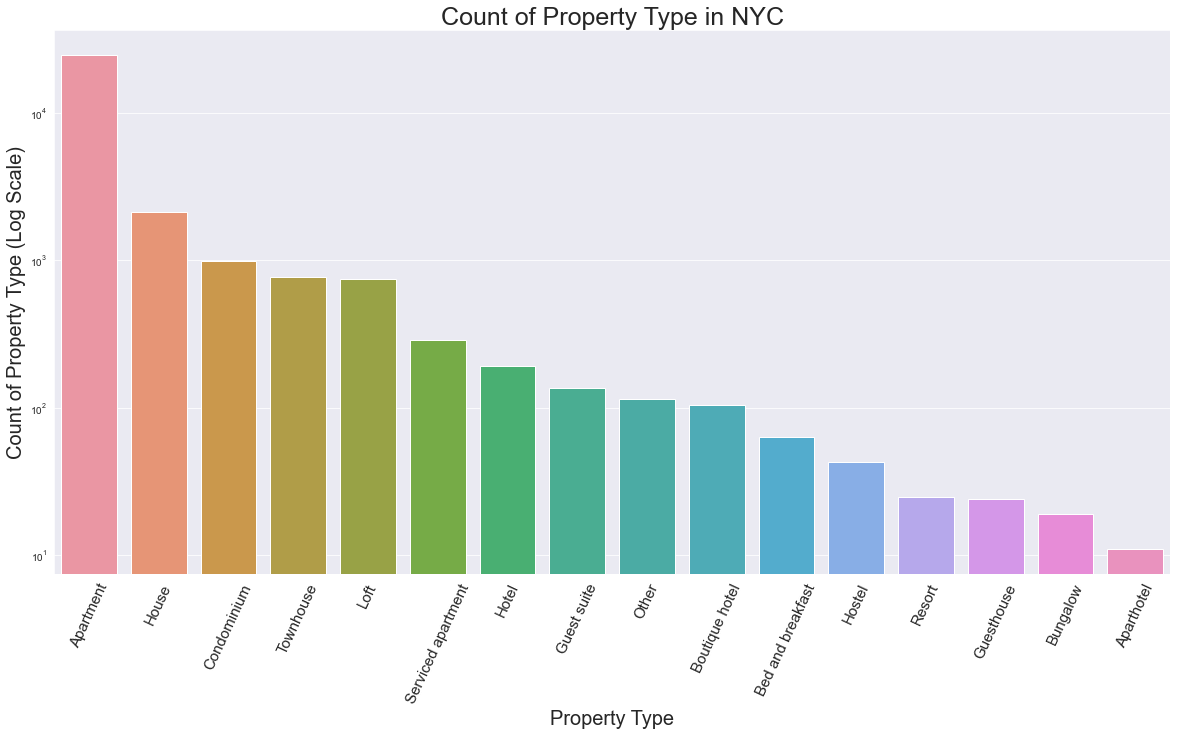

In [120]:
#Creating bar plot to show extreme variance in these
plt.figure(figsize=(20,10))
sns.barplot(x=property_type_count.index, y=property_type_count)
sns.set_style('darkgrid')
plt.yscale('log')
plt.xlabel("Property Type", fontsize=20)
plt.ylabel("Count of Property Type (Log Scale)", fontsize=20)
plt.title("Count of Property Type in NYC", fontsize=25)
plt.xticks(rotation=65, fontsize=15)
plt.show()

####### Try and add values if time???!!!

Private room       15101
Entire home/apt    14238
Shared room          840
Name: room_type, dtype: int64


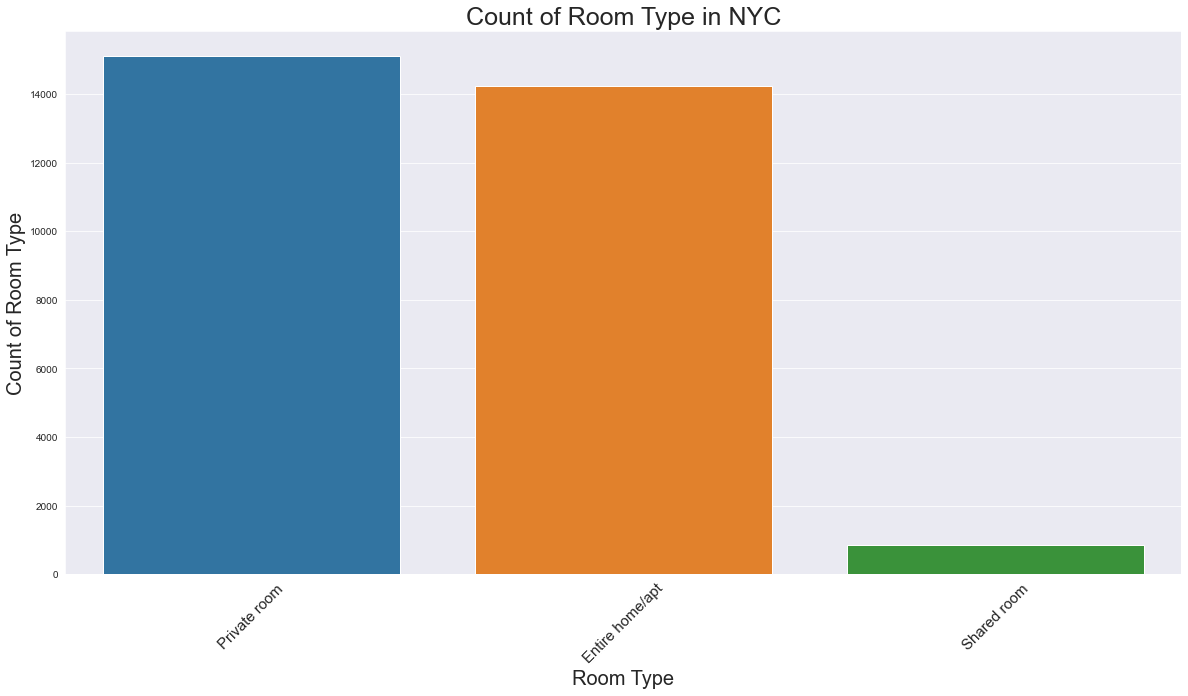

In [121]:
room_type_count = listings['room_type'].value_counts()
print(room_type_count)

#Creating bar plot to show these
plt.figure(figsize=(20,10))
sns.countplot(data=listings, x='room_type')
sns.set_style('darkgrid')
plt.xlabel("Room Type", fontsize=20)
plt.ylabel("Count of Room Type", fontsize=20)
plt.title("Count of Room Type in NYC", fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.show()

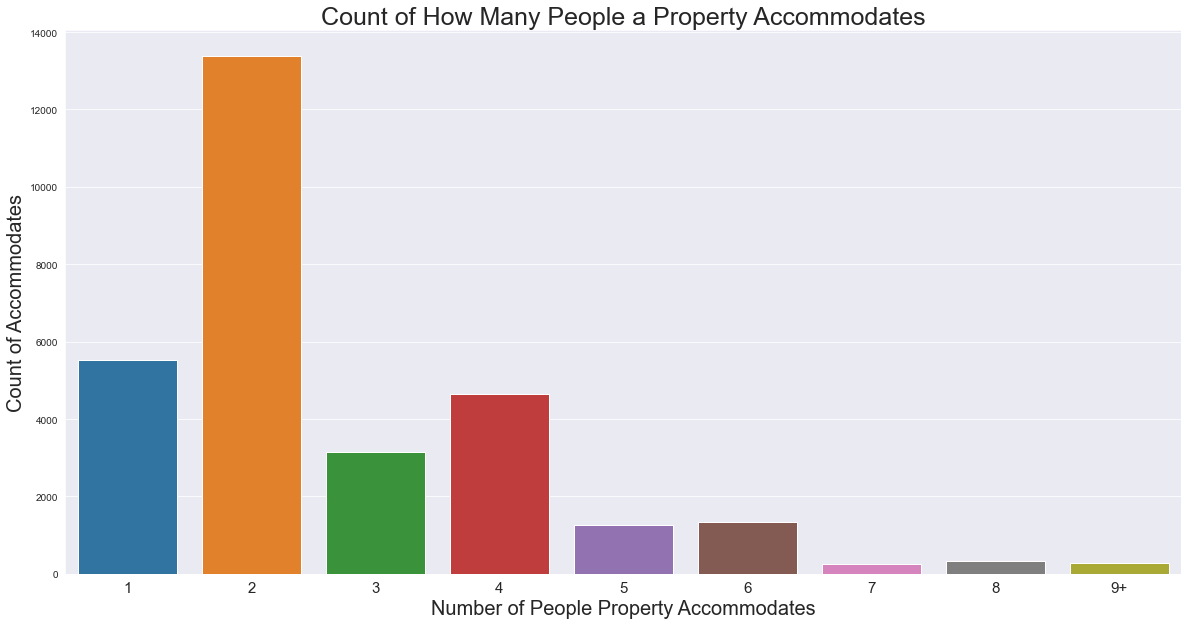

In [122]:
accommodates_count = pd.DataFrame(listings['accommodates'].value_counts()).sort_index()
accommodates_count.loc["9+"] = accommodates_count['accommodates'].loc[[9,10,11,12,13,14,15,16]].sum()
accommodates_count = accommodates_count.drop([9,10,11,12,13,14,15,16])

#Creating bar plot to show this
plt.figure(figsize=(20,10))
sns.barplot(x=accommodates_count.index, y=accommodates_count['accommodates'])
sns.set_style('darkgrid')
plt.xlabel("Number of People Property Accommodates", fontsize=20)
plt.ylabel("Count of Accommodates", fontsize=20)
plt.title("Count of How Many People a Property Accommodates", fontsize=25)
plt.xticks(fontsize=15)
plt.show()

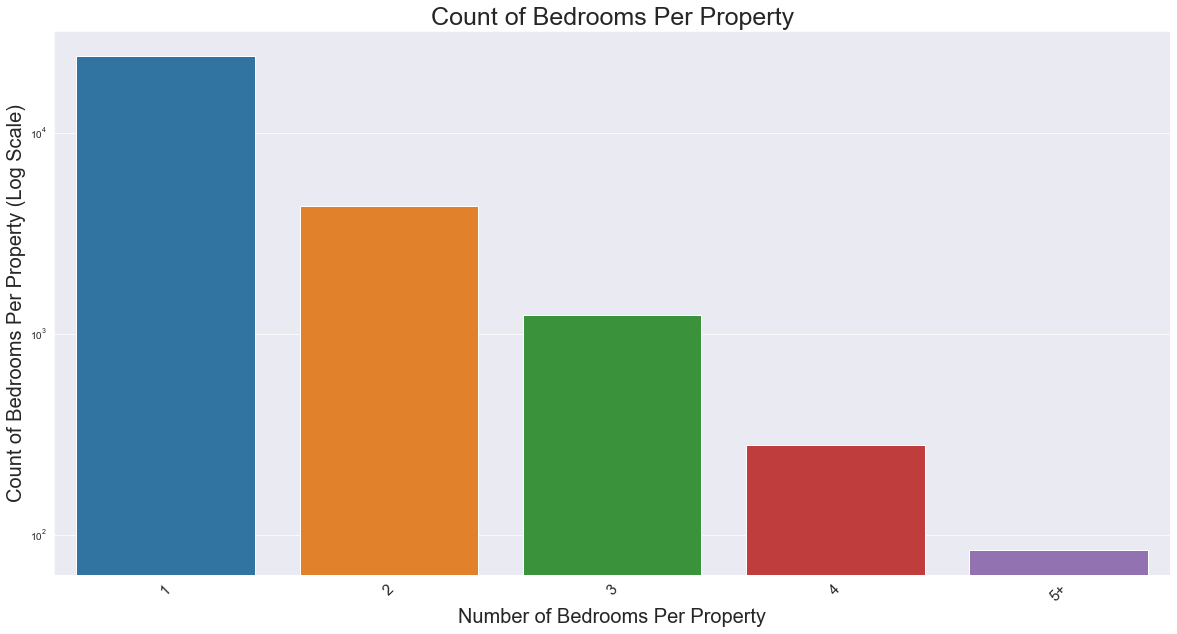

In [123]:
bedrooms_count = pd.DataFrame(listings['bedrooms'].value_counts()).sort_index()
bedrooms_count.loc["5+"] = bedrooms_count['bedrooms'].loc[[5, 6, 7, 8, 11]].sum()
bedrooms_count = bedrooms_count.drop([5, 6, 7, 8, 11])

#Creating bar plot to show this
plt.figure(figsize=(20,10))
sns.barplot(x=bedrooms_count.index, y=bedrooms_count['bedrooms'])
sns.set_style('darkgrid')
plt.xlabel("Number of Bedrooms Per Property", fontsize=20)
plt.ylabel("Count of Bedrooms Per Property (Log Scale)", fontsize=20)
plt.title("Count of Bedrooms Per Property", fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.yscale('log')
plt.show()

In [124]:
### Considering putting the above in a grid-style multi-chart layout

## Considering correlation between accommodates, bedrooms, and availability

<AxesSubplot:>

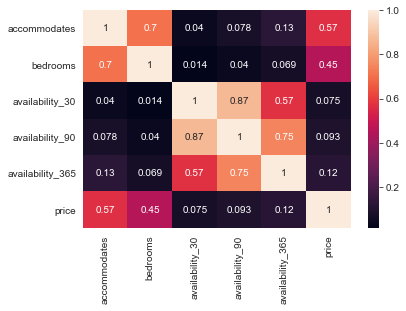

In [125]:
size_type_subset = listings[['accommodates', 'bedrooms', 'availability_30', 'availability_90', 'availability_365',
                            'price']]
sns.heatmap(size_type_subset.corr(), annot=True)

#strong correlation between accommodates & bedrooms, as expected, which is good and shows people aren't crammed into rooms
#Correlation between price & accommodates/bedrooms, higher price, higher accomm, also as expected
#no correlation between availability & property size/accommodates, suggests a variety of places are being booked


## Looking at value per money, price per accommodates vs. price per bedroom
plot price per bedroom vs number of bedrooms
plot price per bedroom vs price per accommodates (box plot comparison)

In [126]:
# Create new variables: price per bedroom, price per accommodates

In [127]:
listings['price_per_bedroom'] = (listings['price']/listings['bedrooms'])
#listings[['price', 'bedrooms','price_per_bedroom']].head()
listings['price_per_accomm'] = (listings['price']/listings['accommodates'])

#Creating a subset of this data to clean for use in graphs
bed_accomm = listings[['price', 'bedrooms', 'accommodates','price_per_bedroom', 'price_per_accomm']]
bed_accomm

,price,bedrooms,accommodates,price_per_bedroom,price_per_accomm
0,149,1,2,149.00,74.500000
1,150,1,2,150.00,75.000000
2,190,2,4,95.00,47.500000
3,60,1,2,60.00,30.000000
4,80,1,2,80.00,40.000000
...,...,...,...,...,...
30174,65,4,6,16.25,10.833333
30175,70,1,3,70.00,23.333333
30176,40,1,1,40.00,40.000000
30177,55,1,1,55.00,55.000000


In [128]:
test=bed_accomm[(bed_accomm['price_per_bedroom']==0)]
print(test)

       price  bedrooms  accommodates  price_per_bedroom  price_per_accomm
12463      0         2             5                0.0               0.0
13911      0         1             2                0.0               0.0
13987      0         1             2                0.0               0.0
14002      0         1             4                0.0               0.0
14607      0         1             3                0.0               0.0
14621      0         1             3                0.0               0.0


In [137]:
#Data cleaning to match previous graphs: '5+' bedrooms grouped together, and '9+' accommodates grouped together
#First removing data where price = 0
bed_accomm=bed_accomm[(bed_accomm['price']!=0)]

bed_accomm.loc[:,('bedrooms')] = bed_accomm.loc[:,('bedrooms')].replace({5:"5+", 6:"5+", 7:"5+", 8:"5+", 11:"5+"})
bed_accomm['bedrooms'].value_counts() #checking it worked

bed_accomm.loc[:,('accommodates')] = bed_accomm.loc[:,('accommodates')].replace({
    9:"9+", 10:"9+", 11:"9+", 12:"9+", 13:"9+", 14:"9+", 15:"9+", 16:"9+"})
bed_accomm['accommodates'].value_counts()

2     13378
1      5538
4      4655
3      3145
6      1340
5      1259
8       318
9+      278
7       262
Name: accommodates, dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='price_per_bedroom'>

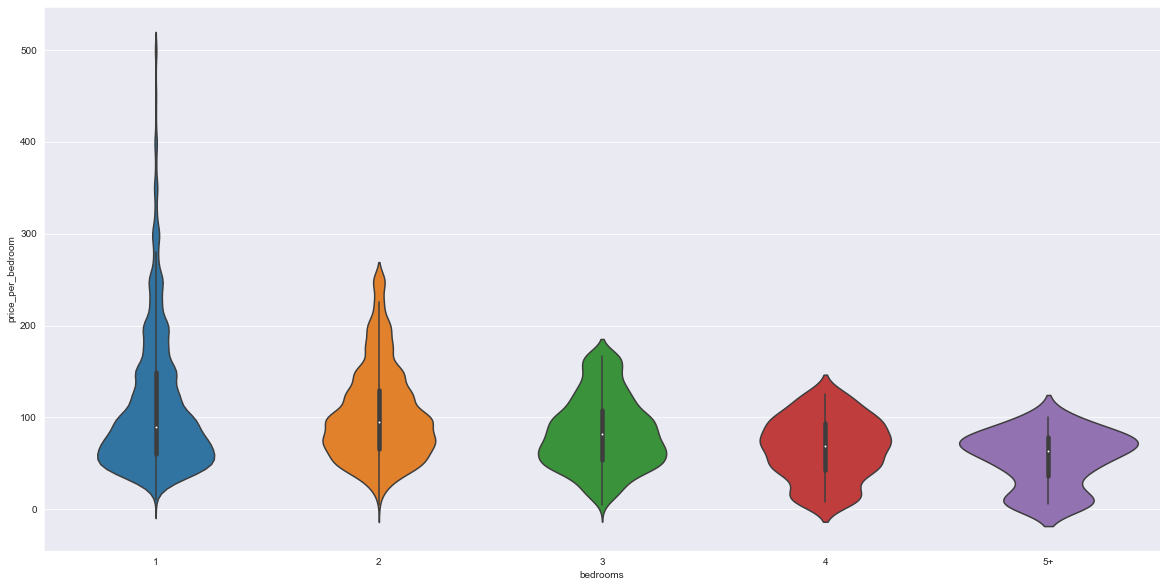

In [130]:
plt.figure(figsize=(20,10))
sns.violinplot(data=bed_accomm, x='bedrooms', y='price_per_bedroom', order=[1,2,3,4,"5+"])

### Tidy this up to be '5+' bedrooms to match before
# Add title, axis, etc.

<AxesSubplot:xlabel='accommodates', ylabel='price_per_accomm'>

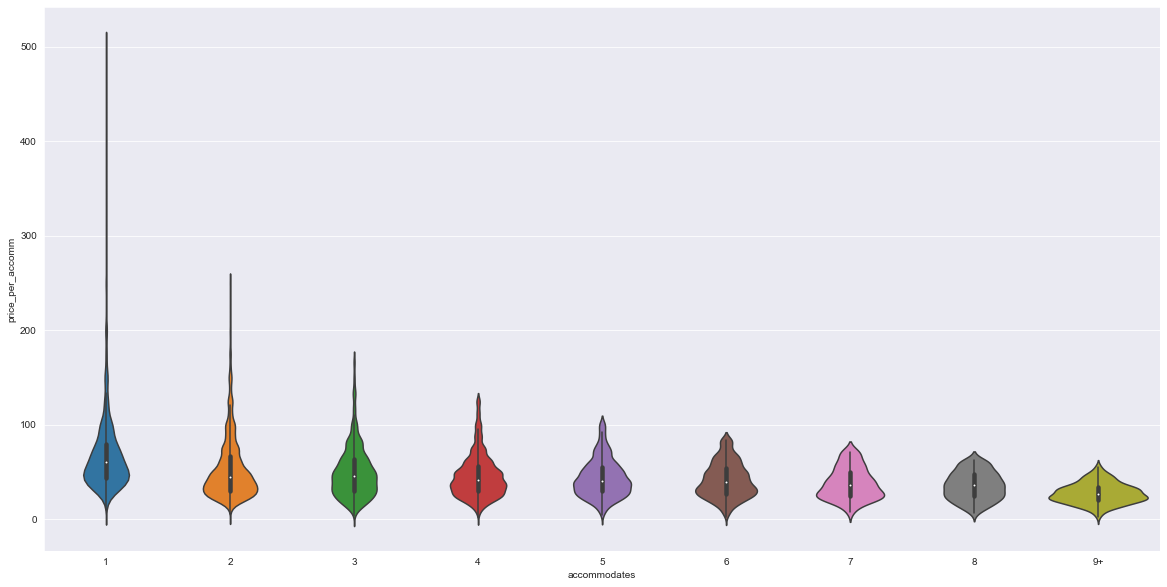

In [131]:
plt.figure(figsize=(20,10))
sns.violinplot(data=bed_accomm, x='accommodates', y='price_per_accomm', 
              order=[1,2,3,4,5,6,7,8,"9+"])

## As above, edit to be 9+ grouped together

In [132]:
# Get some summary stats for these numbers to use in some text

bed_accomm_price = bed_accomm[['price_per_accomm', 'price_per_bedroom']].describe()
print(bed_accomm_price)
# .describe() gets summary stats
## sort variables of accommodates and bedrooms to be 9+, 5+ etc to get more accurate summaries

bed_accomm_by_bed = bed_accomm.groupby(bed_accomm['bedrooms'])[['price_per_accomm', 'price_per_bedroom']].mean()
print(bed_accomm_by_bed)

bed_accomm_by_accomm = bed_accomm.groupby(bed_accomm['accommodates'])[['price_per_accomm', 'price_per_bedroom']].mean()
print(bed_accomm_by_accomm)

       price_per_accomm  price_per_bedroom
count      30173.000000       30173.000000
mean          53.644124         108.746083
std           33.756054          70.353788
min            1.785714           5.000000
25%           32.500000          60.000000
50%           45.000000          90.000000
75%           65.000000         140.000000
max          500.000000         500.000000
          price_per_accomm  price_per_bedroom
bedrooms                                     
1                55.116442         111.603324
2                49.731516         103.762616
3                42.971155          83.377115
4                39.586995          66.595878
5+               34.207454          55.009547
              price_per_accomm  price_per_bedroom
accommodates                                     
1                    69.209462          68.056537
2                    54.185454         106.796831
3                    49.943084         139.087626
4                    45.942374         13

## Looking at location of larger and smaller properties, is there a 'hotspot' for larger ones?
Gap in the market??

In [133]:
from folium.plugins import HeatMap
lat = listings['latitude'].median()
lon = listings['longitude'].median()
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=10, 
                         tiles="CartoDB positron")
folium_hmap.add_child(
    HeatMap(listings[['latitude', 'longitude', 'bedrooms']],
            radius=30, min_opacity=0.1, blur=20))

##Mess around with parameters to get best 'story'

In [134]:
from folium.plugins import HeatMap
lat = listings['latitude'].median()
lon = listings['longitude'].median()
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=10, 
                         tiles="CartoDB positron")
folium_hmap.add_child(
    HeatMap(listings[['latitude', 'longitude', 'price_per_bedroom']],
            radius=30, min_opacity=0.1, blur=20))

##Mess around with parameters to get best 'story'

## CONCLUSIONS

Biggest/main conclusions from analysis

## Additional/future analysis: 
* Exploring amenities within NYC properties - on average how many does each property have, which are most/least common? Are properties with more amenities found in similar locations?
* Explore what makes a property popular - is it the price, amenities, size, location?
* Are some hosts dominating the market in NYC? 